<a href="https://colab.research.google.com/github/Sachiprajapati/ML-Programs/blob/main/Recommender_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505176 sha256=8c504a671469892d9c129b940dd72d2e5a7c740c2e03780435edfeba3faa90bb
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise



=== Recommendations for Movie: Harry Potter and the Sorcerer's Stone ===

1. Harry Potter and the Deathly Hallows: Part 1 → Similarity Score: 0.98
IMDB_Rating       7.7
No_of_Votes    479120
Genre              55
Director          107
Name: 755, dtype: object
--------------------------------------------------
2. The Social Network → Similarity Score: 0.97
IMDB_Rating       7.7
No_of_Votes    624982
Genre              85
Director          100
Name: 748, dtype: object
--------------------------------------------------
3. Captain America: The Winter Soldier → Similarity Score: 0.95
IMDB_Rating       7.7
No_of_Votes    736182
Genre              11
Director           36
Name: 737, dtype: object
--------------------------------------------------
4. Big Hero 6 → Similarity Score: 0.94
IMDB_Rating       7.8
No_of_Votes    410983
Genre              62
Director          114
Name: 592, dtype: object
--------------------------------------------------
5. Argo → Similarity Score: 0.94
IMDB_Rating  

<ipython-input-4-6f2728e1c859>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=movie_names, palette="viridis")


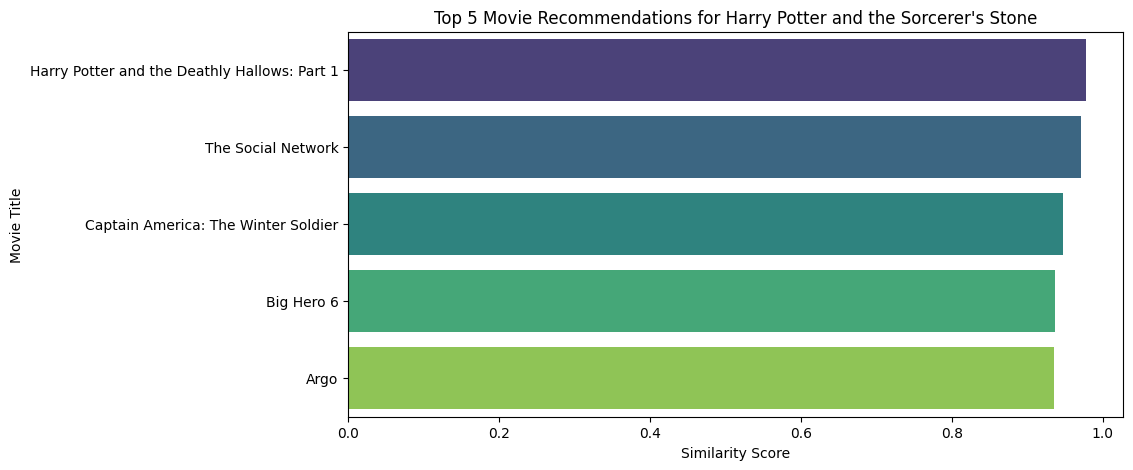

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

file_path = "imdb_top_1000.csv"
data = pd.read_csv(file_path)
data['Genre'] = data['Genre'].fillna(data['Genre'].mode().iloc[0])
data['Director'] = data['Director'].fillna(data['Director'].mode().iloc[0])

encoder = LabelEncoder()
data['Genre'] = encoder.fit_transform(data['Genre'])
data['Director'] = encoder.fit_transform(data['Director'])

X = data[['IMDB_Rating', 'No_of_Votes', 'Genre', 'Director']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

similarity_matrix = cosine_similarity(X_scaled)

def recommend(movie_title, n=5):
    if movie_title not in data['Series_Title'].values:
        return "Movie not found in dataset!"

    index = data[data['Series_Title'] == movie_title].index[0]
    print(f"\n=== Recommendations for Movie: {movie_title} ===\n")
    scores = list(enumerate(similarity_matrix[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    recommended_movies = scores[1:n + 1]

    movie_names = []
    similarity_scores = []

    for i, (index, score) in enumerate(recommended_movies):
        movie_names.append(data.iloc[index]['Series_Title'])
        similarity_scores.append(score)
        print(f"{i + 1}. {data.iloc[index]['Series_Title']} → Similarity Score: {score:.2f}")
        print(data.iloc[index][['IMDB_Rating', 'No_of_Votes', 'Genre', 'Director']])
        print("-" * 50)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=similarity_scores, y=movie_names, palette="viridis")
    plt.xlabel("Similarity Score")
    plt.ylabel("Movie Title")
    plt.title(f"Top {n} Movie Recommendations for {movie_title}")
    plt.show()

recommend("Harry Potter and the Sorcerer's Stone", 5)



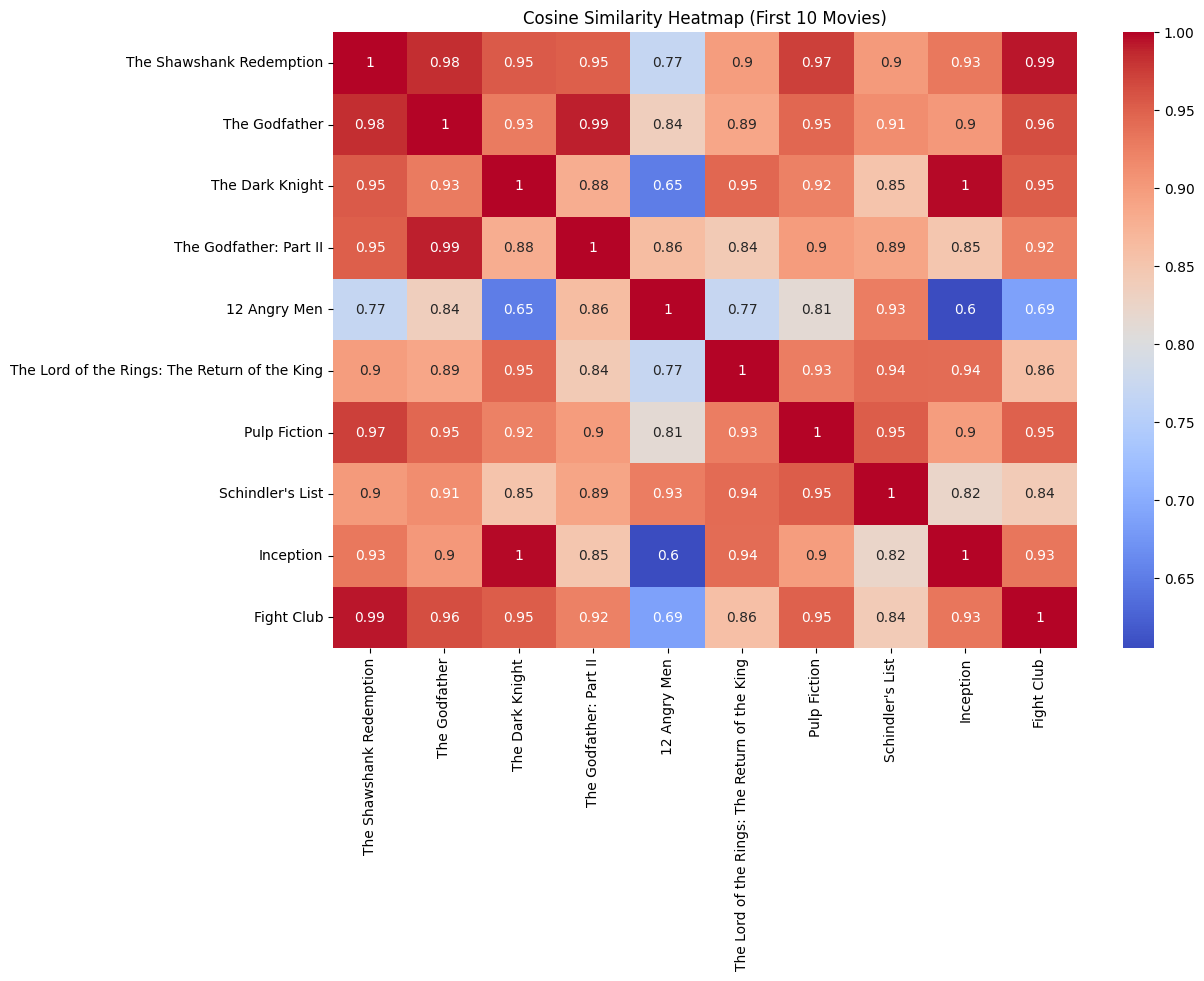

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix[:10, :10], annot=True, cmap="coolwarm", xticklabels=data['Series_Title'][:10], yticklabels=data['Series_Title'][:10])
plt.title("Cosine Similarity Heatmap (First 10 Movies)")
plt.show()